# Example data integration and analysis for ArXiV metadata
## Library imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import datetime
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
sns.set(font_scale=1.5, style="whitegrid",rc={"lines.linewidth": 2.5})

In [3]:
def time_elapsed(start):
    end = datetime.datetime.now()

    time_to_run = end - start
    minutes = int(time_to_run.seconds/60)
    seconds = time_to_run.seconds % 60
    return "Total runtime: " + str(minutes) + " minutes, " + str(seconds) + " seconds"

In [4]:
start = datetime.datetime.now()


## Import data

There are two different folders for different slices of ArXiV: `per_category` and `per_year`. The easiest for getting the full dataset is to combine `per_year`.

Note: it is very important to specify the data types, particularly `arxiv_id`, as Pandas may assume they are floats based on some initial rows, when they are actually strings. 

In [5]:
dumpdate = "20190101"

In [6]:
datadir = "processed_data/" + dumpdate + "/per_year/"

In [7]:
files = glob.glob(datadir + "*.tsv.zip")
len(files)
files.sort()

In [8]:
dtypes = {
    "abstract": object,
    "acm_class": object,
    "arxiv_id": object,
    "author_text": object,
    "categories": object,
    "comments": object,
    "created": object,
    "doi": object,
    "num_authors": int,
    "num_categories": int,
    "primary_cat": object,
    "title": object,
    "updated": object,
    "created_ym": object
    }

In [9]:
df_all = pd.DataFrame()

for file in files:
    print(file)
    
    yearly_df = pd.read_csv(file,
                            sep="\t",
                            index_col=0,
                            compression='zip',
                            dtype=dtypes,
                            parse_dates=["created","updated"])
        
    df_all = df_all.append(yearly_df)
    
    print("Records this year: ", len(yearly_df), "Cumulative total: ", len(df_all), "\n")

processed_data/20190101/per_year/1993.tsv.zip
Records this year:  6728 Cumulative total:  6728 

processed_data/20190101/per_year/1994.tsv.zip
Records this year:  10085 Cumulative total:  16813 

processed_data/20190101/per_year/1995.tsv.zip
Records this year:  12994 Cumulative total:  29807 

processed_data/20190101/per_year/1996.tsv.zip
Records this year:  15875 Cumulative total:  45682 

processed_data/20190101/per_year/1997.tsv.zip
Records this year:  19621 Cumulative total:  65303 

processed_data/20190101/per_year/1998.tsv.zip
Records this year:  24174 Cumulative total:  89477 

processed_data/20190101/per_year/1999.tsv.zip
Records this year:  27694 Cumulative total:  117171 

processed_data/20190101/per_year/2000.tsv.zip
Records this year:  30672 Cumulative total:  147843 

processed_data/20190101/per_year/2001.tsv.zip
Records this year:  33128 Cumulative total:  180971 

processed_data/20190101/per_year/2002.tsv.zip
Records this year:  36103 Cumulative total:  217074 

processe

### Checking merged dataframe

In [10]:
len(df_all)

1480220

In [11]:
df_all = df_all.drop_duplicates()
len(df_all)

1480220

In [12]:
df_all.sample(2).transpose()

,64120,80713
abstract,"Due to resource restricted sensor nodes, it is...",The emergence of Web services in the informati...
acm_class,NaN,NaN
arxiv_id,1608.05936,1211.4867
author_text,"Jacques M. Bahi, Christophe Guyeux, Abdallah M...","Faîçal Felhi, Jalel Akaichi"
categories,"cs.DC,cs.CR",cs.SE
comments,NaN,"14 pages, 4 figures, 1 Code; International Jou..."
created,2016-08-21 00:00:00,2012-11-20 00:00:00
doi,NaN,10.5121/ijwest.2012.3401
num_authors,3,2
num_categories,2,1


## Analysis variables

### Adding timestamp variable

In [13]:
df_all['created_ts'] = pd.to_datetime(df_all.created)

In [14]:
def has_colon(title):
    if title.find(":") == -1:
        return 0
    else:
        return 1

In [15]:
df_all['has_colon_title'] = df_all.title.apply(has_colon)

In [16]:
df_all.has_colon_title.value_counts()

0    1303090
1     177130
Name: has_colon_title, dtype: int64

In [17]:
df_all['title_len'] = df_all.title.apply(len)

In [18]:
df_all['abs_len'] = df_all.abstract.apply(len)

In [19]:
def word_count(string):
    return len(string.split(" "))

In [20]:
df_all['title_words'] = df_all.title.apply(word_count)
df_all['abs_words'] = df_all.abstract.apply(word_count)

In [21]:
df_all['chars_per_word_title'] = df_all.title_len/df_all.title_words
df_all['chars_per_word_abs'] = df_all.abs_len/df_all.abs_words

In [22]:
df_all['abs_title_ratio_chars'] = df_all.abs_len/df_all.title_len

## Analysis
### Number of authors and categories per paper

Text(0.5, 0, 'Number of authors')

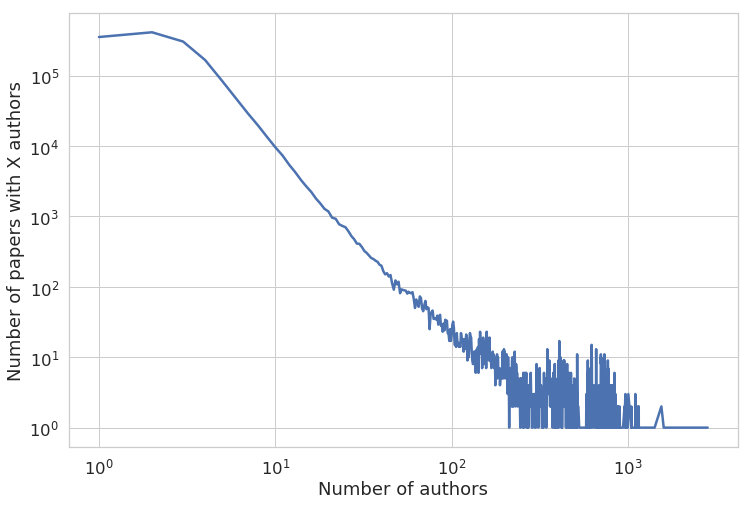

In [23]:
num_authors_counts = df_all.num_authors.value_counts().sort_index()
fig = num_authors_counts.plot(kind='line', 
                              logy=True, 
                              logx=True, 
                              figsize=[12,8])

fig.set_ylabel("Number of papers with X authors")
fig.set_xlabel("Number of authors")

In [24]:
df_all.set_index("created_ts", inplace=True, drop=False)
df_all.sample(2).transpose()

created_ts,2014-01-30 00:00:00,2006-04-10 00:00:00
abstract,This work studies the statistical properties o...,"In this paper, we analyze the scaling properti..."
acm_class,NaN,NaN
arxiv_id,1401.7893,cond-mat/0604256
author_text,"Daniel Commenges, Jérémie Bureau, Hein Putter","S. G. Alves, S. C. Ferreira"
categories,"math.ST,stat.TH",cond-mat.stat-mech
comments,"15 pages, 1 figure","7 pages, 6 figures. accepted for publication o..."
created,2014-01-30 00:00:00,2006-04-10 00:00:00
doi,NaN,10.1103/PhysRevE.73.051401
num_authors,3,2
num_categories,2,1


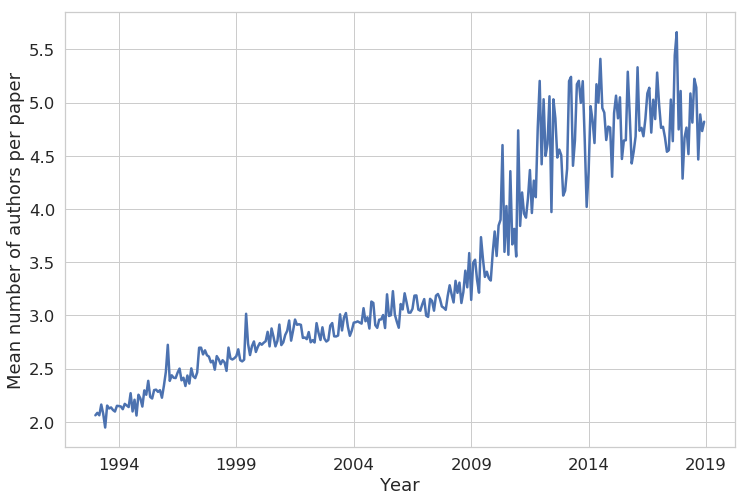

In [25]:
fig = df_all.groupby(pd.Grouper(freq='M')).num_authors.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean number of authors per paper")
l = fig.set_xlabel("Year")

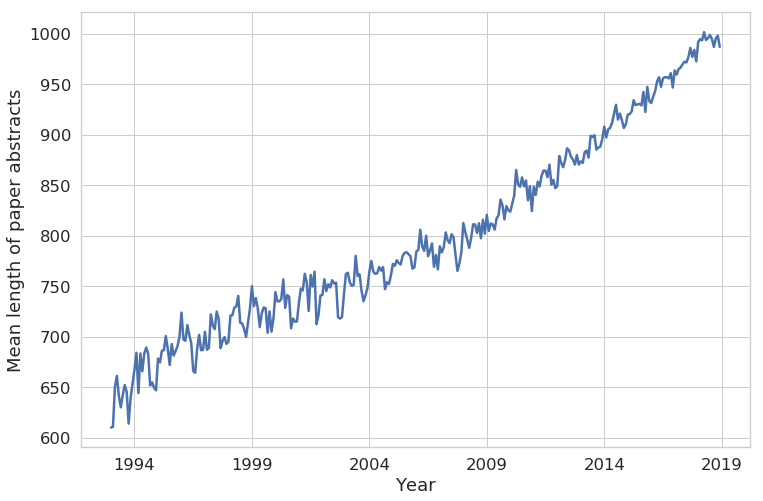

In [26]:
fig = df_all.groupby(pd.Grouper(freq='M')).abs_len.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean length of paper abstracts")
l = fig.set_xlabel("Year")


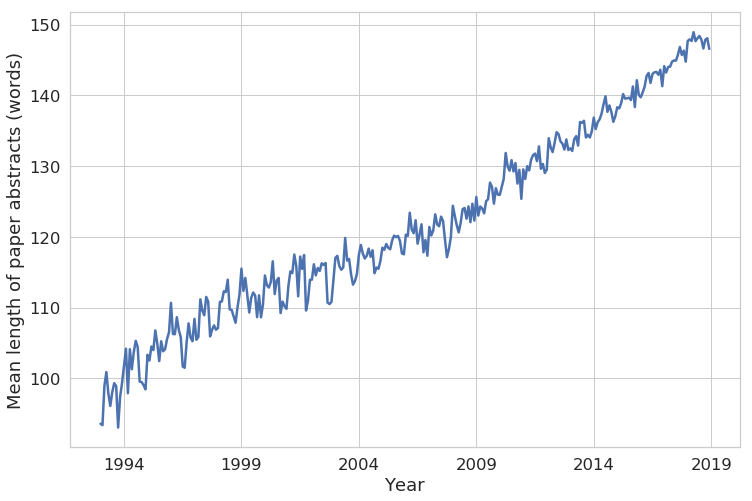

In [27]:
fig = df_all.groupby(pd.Grouper(freq='M')).abs_words.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean length of paper abstracts (words)")
l = fig.set_xlabel("Year")

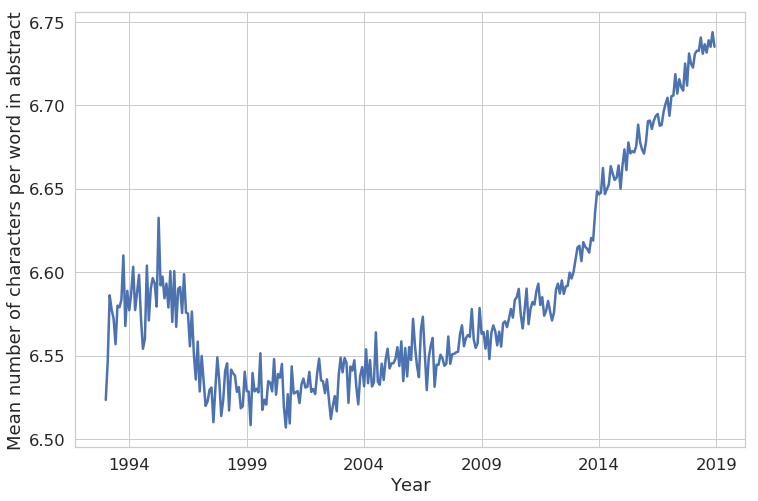

In [28]:
fig = df_all.groupby(pd.Grouper(freq='M')).chars_per_word_abs.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean number of characters per word in abstract")
l = fig.set_xlabel("Year")

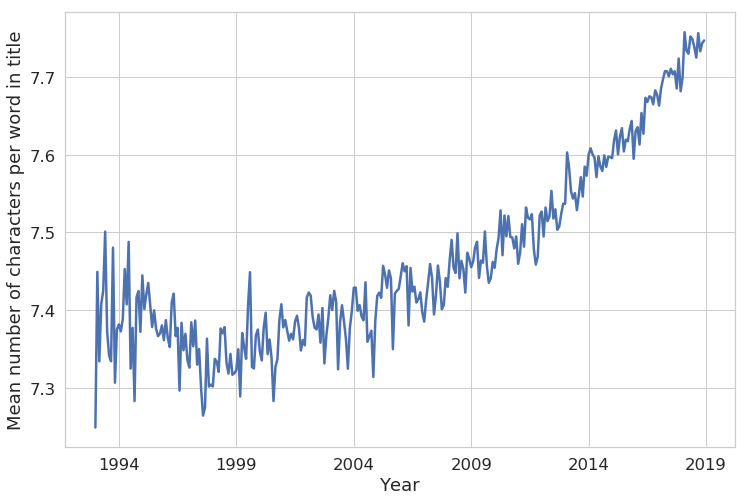

In [29]:
fig = df_all.groupby(pd.Grouper(freq='M')).chars_per_word_title.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean number of characters per word in title")
l = fig.set_xlabel("Year")

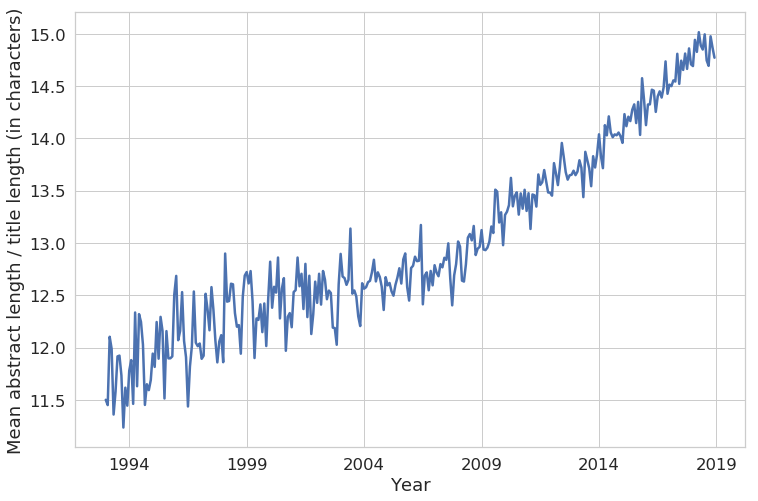

In [30]:
fig = df_all.groupby(pd.Grouper(freq='M')).abs_title_ratio_chars.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean abstract length / title length (in characters)")
l = fig.set_xlabel("Year")

In [31]:
monthly_title_len = pd.DataFrame(df_all.groupby(pd.Grouper(freq='M')).title_len.mean()).reset_index(level=0)

monthly_title_len[0:5]

monthly_title_len.columns = ["date","title_len"]

In [32]:
def to_ym(dt):
    try:
        return dt.strftime("%Y-%m")
    except:
        return ""

Text(0.2, 0.82, '$r^2$=0.970')

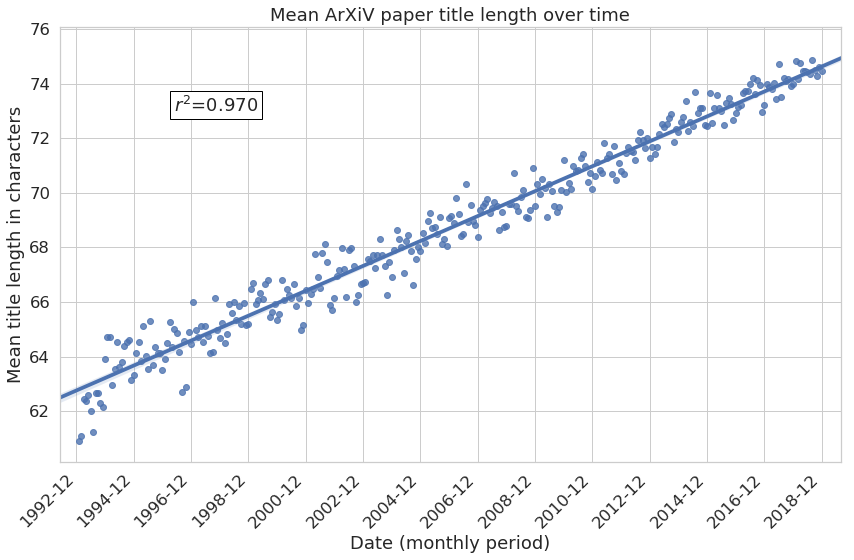

In [33]:
df = monthly_title_len
df['date_f'] = pd.factorize(df['date'])[0] + 1
mapping = dict(zip(df['date_f'], df['date'].dt.date))

fig, ax = plt.subplots(figsize=[14,8])

sns.regplot('date_f', 'title_len', data=df, ax=ax, fit_reg=True, ci=95)

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(24))

ax.set_xlim([-7,320])
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('').apply(to_ym)
labels[1] = "1992-12"
labels[14] = "2018-12"
l = ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_title("Mean ArXiV paper title length over time")
plt.xlabel("Date (monthly period)")
plt.ylabel("Mean title length in characters")

from scipy import stats
r2 = stats.pearsonr(monthly_title_len.date_f, monthly_title_len.title_len)[0] ** 2
s = "$r^2$=" + str(r2)[0:5]
bbox_dict = dict(facecolor='white', edgecolor='black', alpha=1)
plt.text(.2,.82,s,
         fontsize=18,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes,
         bbox=bbox_dict)

In [34]:
monthly_abs_len = pd.DataFrame(df_all.groupby(pd.Grouper(freq='M')).abs_len.mean()).reset_index(level=0)

monthly_abs_len.columns = ["date","title_len"]

Text(0.2, 0.82, '$r^2$=0.953')

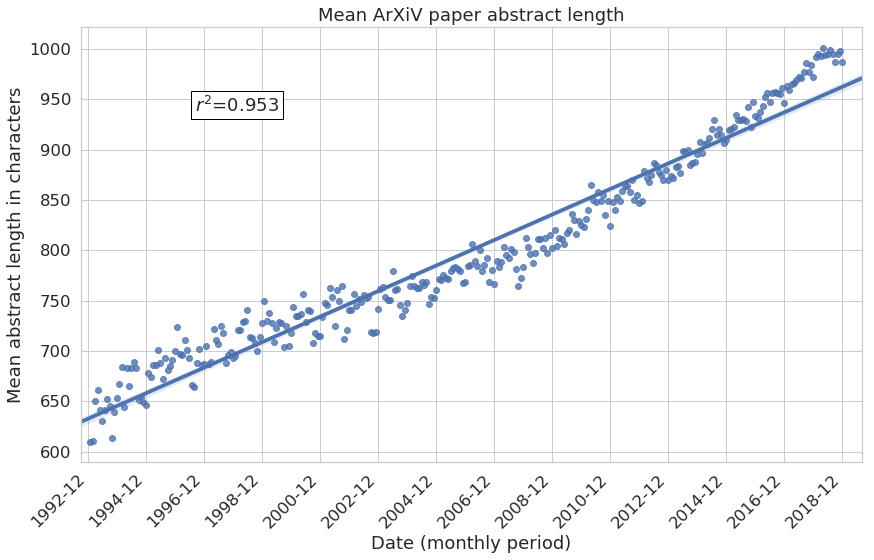

In [35]:
df = monthly_abs_len
df['date_f'] = pd.factorize(df['date'])[0] + 1
mapping = dict(zip(df['date_f'], df['date'].dt.date))

fig, ax = plt.subplots(figsize=[14,8])

sns.regplot('date_f', 'title_len', data=df, ax=ax, fit_reg=True, ci=95)

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(24))

ax.set_xlim([-3,320])
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('').apply(to_ym)
labels[1] = "1992-12"
labels[14] = "2018-12"
l = ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_title("Mean ArXiV paper abstract length")
plt.xlabel("Date (monthly period)")
plt.ylabel("Mean abstract length in characters")

from scipy import stats
r2 = stats.pearsonr(monthly_abs_len.date_f, monthly_abs_len.title_len)[0] ** 2
s = "$r^2$=" + str(r2)[0:5]
bbox_dict = dict(facecolor='white', edgecolor='black', alpha=1)
plt.text(.2,.82,s,
         fontsize=18,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes,
         bbox=bbox_dict)

Text(0.5, 1.0, 'Length of ArXiV paper titles over time')

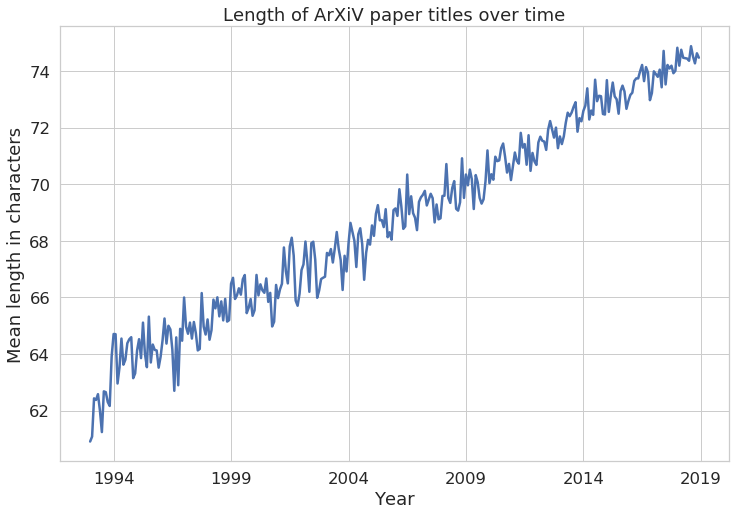

In [36]:
fig = df_all.groupby(pd.Grouper(freq='M')).title_len.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean length in characters")
l = fig.set_xlabel("Year")
fig.set_title("Length of ArXiV paper titles over time")

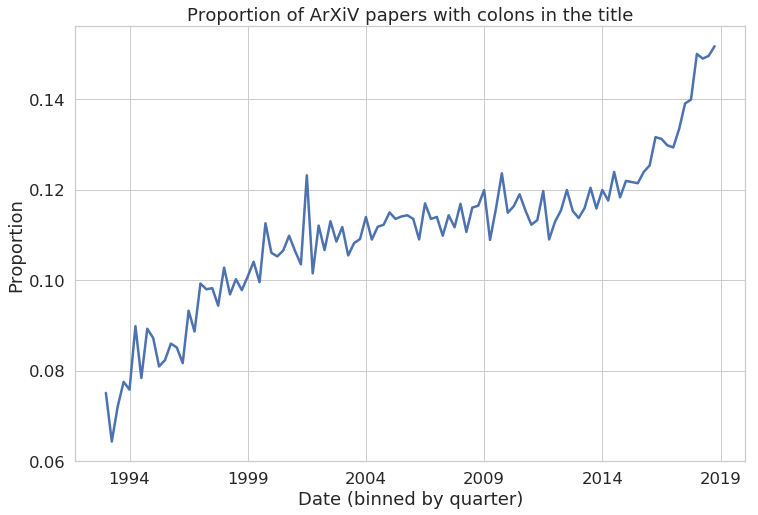

In [37]:
fig = df_all.groupby(pd.Grouper(freq='Q')).has_colon_title.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Proportion")
l = fig.set_xlabel("Date (binned by quarter)")
l = fig.set_title("Proportion of ArXiV papers with colons in the title")

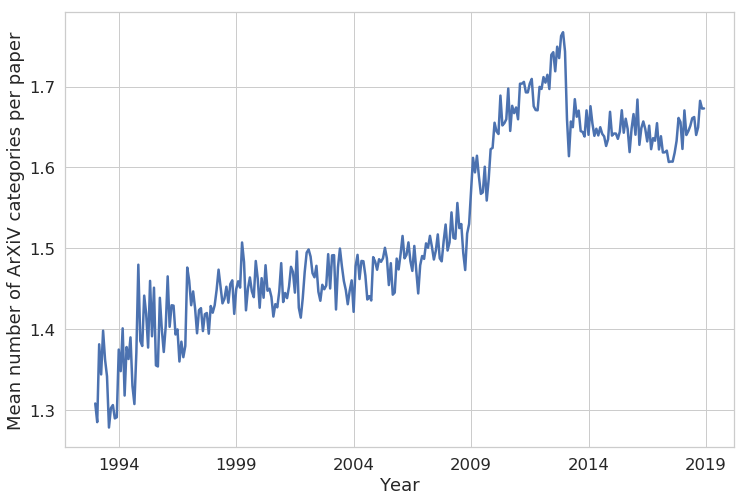

In [38]:
fig = df_all.groupby(pd.Grouper(freq='M')).num_categories.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean number of ArXiV categories per paper")
l = fig.set_xlabel("Year")

### Most common last names

In [39]:
def last_name(name):
    name_split = name.split(" ")
    return name_split[len(name_split)-1]
        

In [40]:
allnames = []
count = 0
for paper in df_all.iterrows():
    for author in paper[1].author_text.split(", "):
        allnames.append(last_name(author))
    count += 1
    if count % 100000 == 0:
        print(count)

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000


In [41]:
allnames_s = pd.Series(allnames)
allnames_s.value_counts()[0:50]

Wang             48079
Zhang            43497
Li               40256
Liu              32447
Chen             30110
Kim              20476
Lee              19184
Yang             18149
Wu               15214
Xu               14802
Collaboration    13919
Huang            12826
Zhou             12127
Zhao             12005
Zhu              10768
Sun              10593
Smith            10071
Yu                9312
Lin               9013
Ma                8918
Lu                8578
Hu                8013
Guo               7431
He                6954
Park              6905
Jiang             6703
Gao               6142
Singh             5996
Kumar             5819
Williams          5727
Han               5600
Martin            5575
Zheng             5541
Shen              5538
Schmidt           5410
Luo               5204
Song              5105
Yuan              5085
Yan               5054
Chang             4930
Jones             4906
Silva             4903
Johnson           4866
Tang       

### Functions for text matching

In [42]:
def search_count(df,pattern,period="year"):
    """
    Helper function for search_counts. Takes a dataframe and a string pattern and
    returns the yearly proportion of items that match the string (case insensitive).
        
    """
      
    
    df_temp = df
    
    
    df_temp['search_abs'] = df_temp['abstract'].str.lower().str.contains(pattern)
    df_temp['search_title'] = df_temp['abstract'].str.lower().str.contains(pattern)

    
    
    df_temp.search_abs.replace(to_replace=False, value=0, inplace=True)
    df_temp.search_title.replace(to_replace=True, value=1, inplace=True)
    
    df_temp.search_abs.replace(to_replace=False, value=0, inplace=True)
    df_temp.search_title.replace(to_replace=True, value=1, inplace=True)
    
    yearly_matches = df_temp.query('search_abs == 1 or search_title == 1').created_ts.dt.year.value_counts().sort_index().fillna(0)
    yearly_all = df_temp.created_ts.dt.year.value_counts().sort_index().fillna(0)
    
    df = (yearly_matches/yearly_all).rename(pattern).fillna(0)
    
    return df


In [43]:
def search_counts(df,pattern_str_or_list,period="year"):
    """
    Main function for search_counts. Takes a dataframe and a string pattern or list
    of string patterns and returns the yearly proportion of items that match the string
    in a pandas DataFrame.
        
    """
    
    
    if type(pattern_str_or_list) is not list:
        df = pd.DataFrame(search_count(df,pattern_str_or_list))
        df.index.rename("year",inplace=True)
        return df.loc[(df!=0).any(1)]
    
    else:
        pattern_list = []
        for item in pattern_str_or_list:
            pattern_list.append(search_count(df,item).rename(item))
        
        df = pd.DataFrame(pattern_list).transpose()
        df.index.rename("year",inplace=True)
        
        return df.loc[(df!=0).any(1)] # remove all rows with all zeros


## Text analysis

In [44]:
d = search_counts(df_all, ["reprod","open","replic"])
d

,reprod,open,replic
year,,,
1993,0.022295,0.023335,0.001189
1994,0.023302,0.019236,0.004065
1995,0.024858,0.021241,0.003309
1996,0.023244,0.022362,0.003150
1997,0.025942,0.023801,0.003364
1998,0.024779,0.023786,0.003682
1999,0.026360,0.026684,0.003791
2000,0.024746,0.029604,0.003912
2001,0.023696,0.028375,0.003109


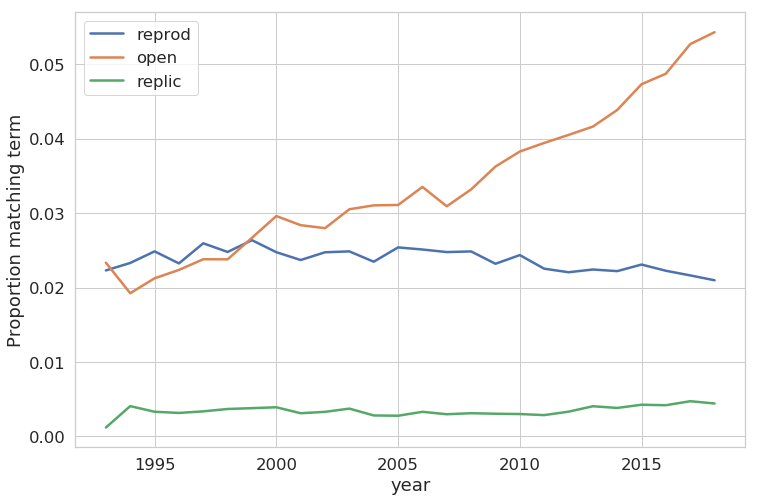

In [45]:
fig = d.plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")


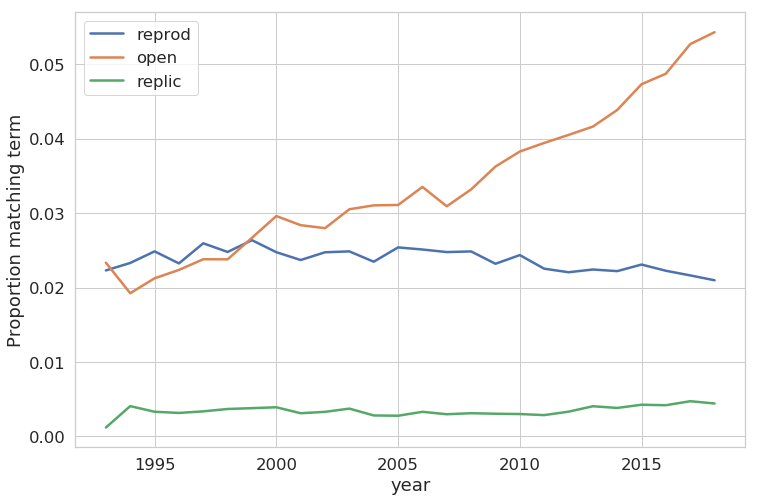

In [46]:
terms = ["reprod","open","replic"]
fig = search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

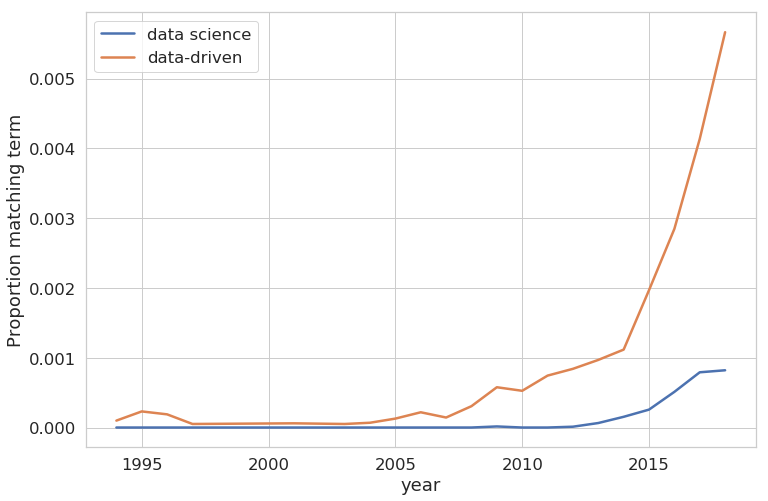

In [47]:
terms = ["data science","data-driven"]
fig = search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

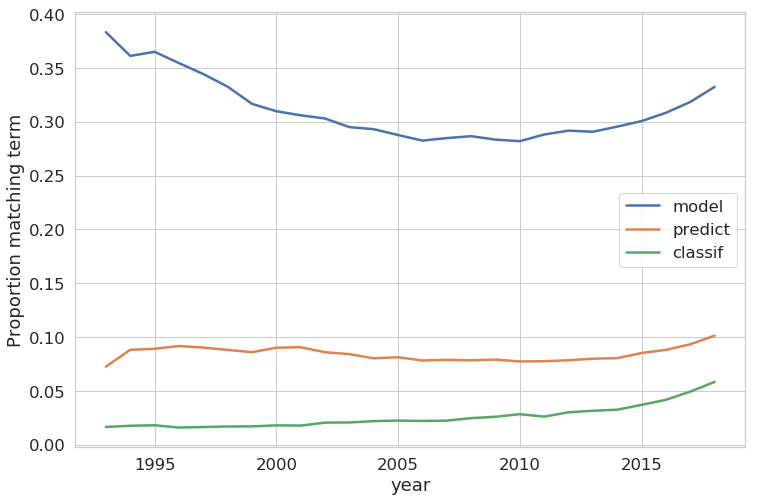

In [48]:
terms = ["model","predict","classif"]
fig = search_counts(df_all,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

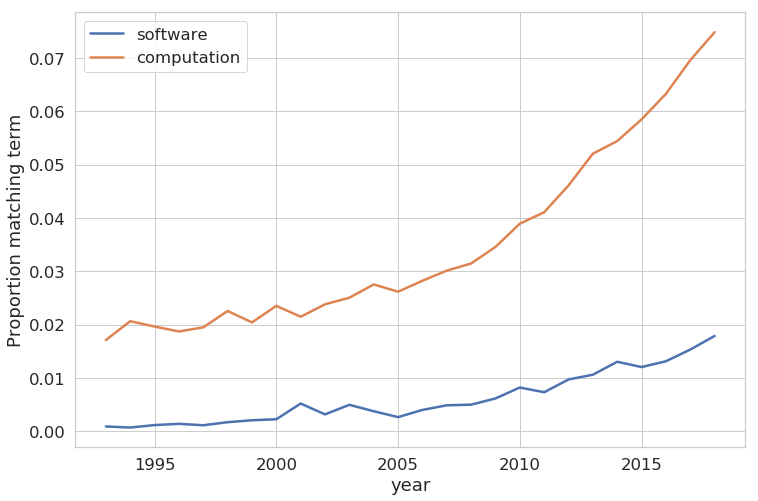

In [49]:
terms = ["software","computation"]
fig = search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

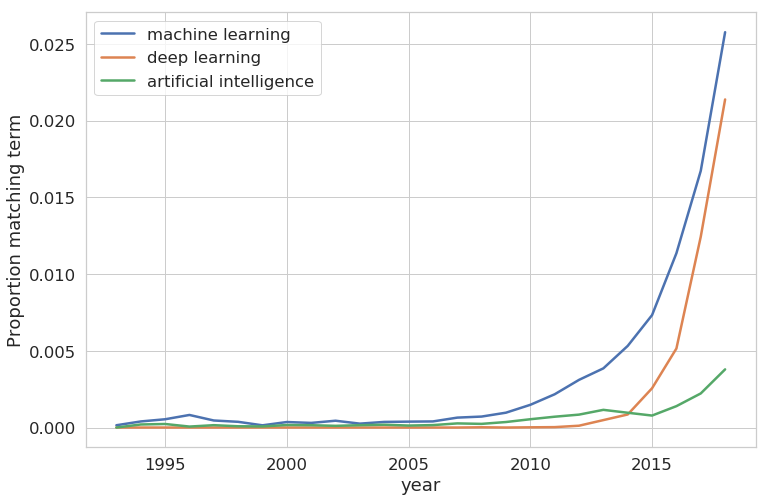

In [50]:
terms = ["machine learning","deep learning","artificial intelligence"]
fig = search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

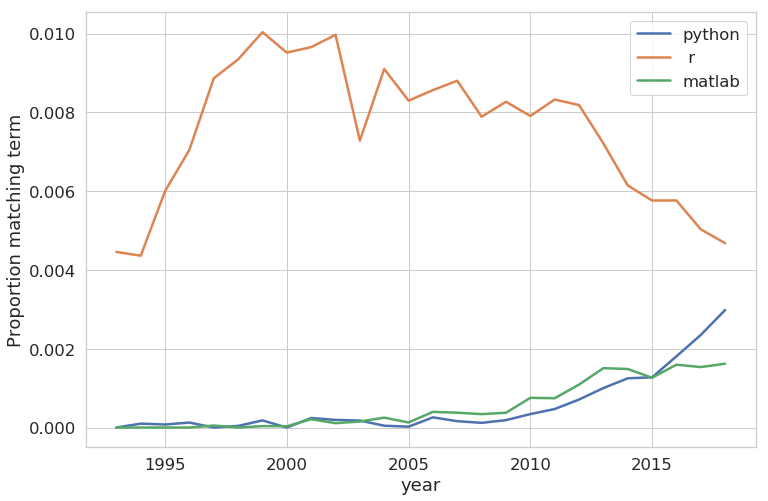

In [51]:
terms = ["python"," r ","matlab"]
fig = search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

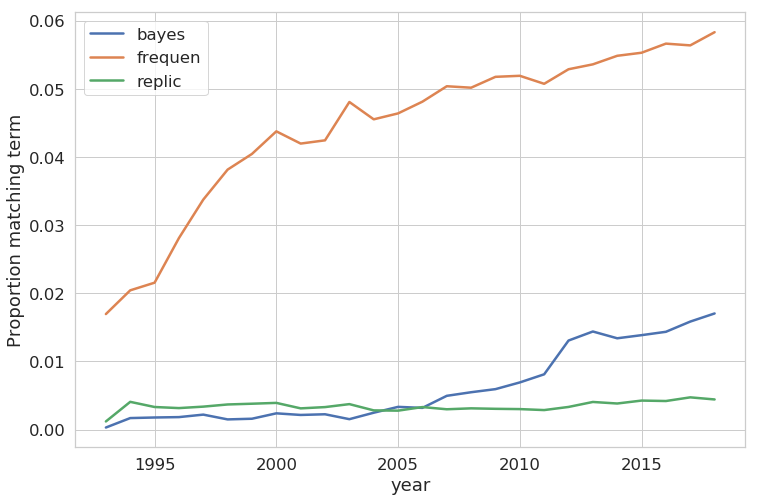

In [52]:
terms = ["bayes","frequen","replic"]
fig = search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

## Searching a specific category

Create a new dataframe by filtering the `categories` variable. If you're filtering from df_all, you shouldn't need to drop duplicates, but it is good to be safe.

In [53]:
df_astro = df_all[df_all.categories.str.contains("astro")].copy()

In [54]:
len(df_astro)

248376

In [55]:
df_astro = df_astro.drop_duplicates()
len(df_astro)

248376

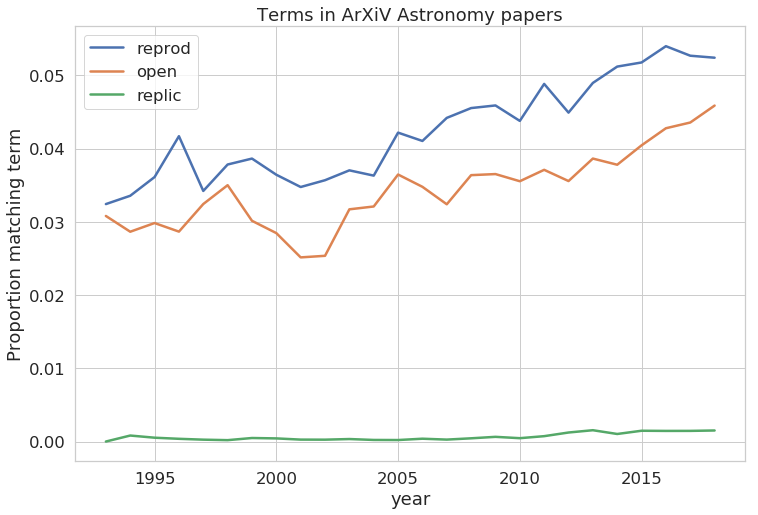

In [56]:
terms = ["reprod","open","replic"]
fig = search_counts(df_astro, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")
title = fig.set_title("Terms in ArXiV Astronomy papers")

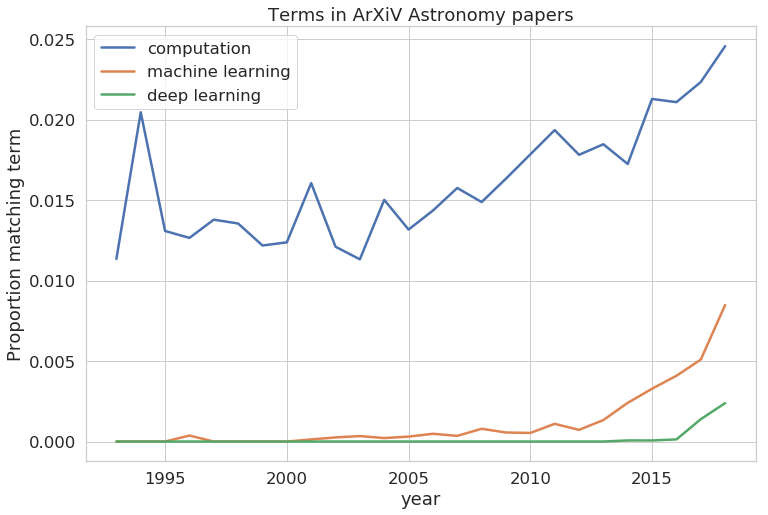

In [57]:
terms = ["computation","machine learning","deep learning"]
fig = search_counts(df_astro,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")
title = fig.set_title("Terms in ArXiV Astronomy papers")

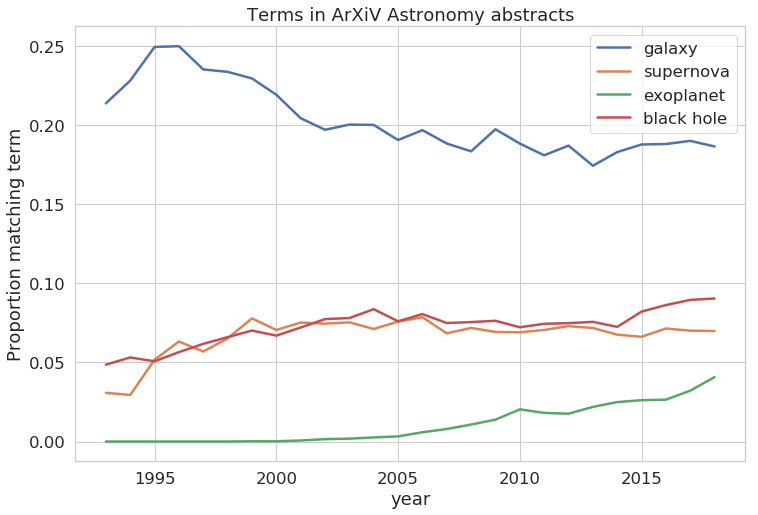

In [58]:
terms = ["galaxy","supernova","exoplanet","black hole"]
fig = search_counts(df_astro,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")
title = fig.set_title("Terms in ArXiV Astronomy abstracts")

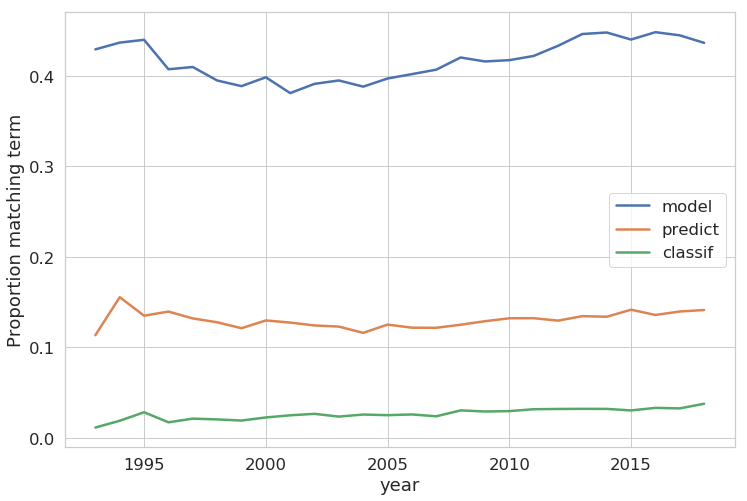

In [59]:
terms = ["model","predict","classif"]
fig = search_counts(df_astro,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

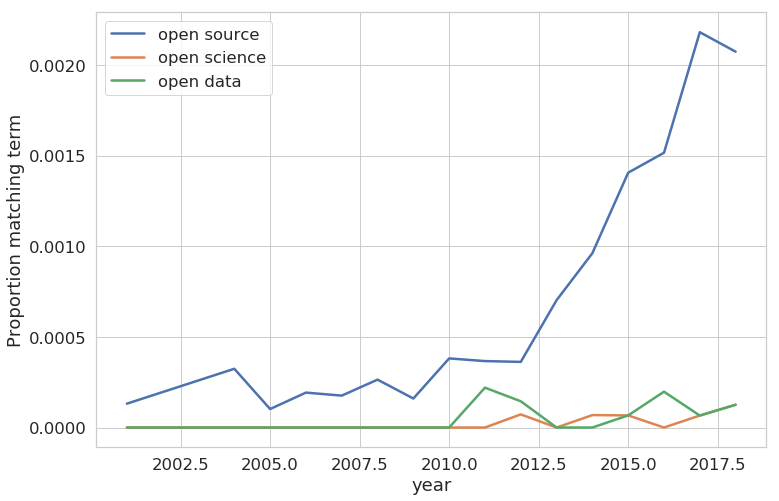

In [60]:
terms = ["open source","open science","open data"]
fig = search_counts(df_astro,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

## Searching multiple categories

If you're using this method instead of searching, you must drop duplicates, as papers are included in a category if they are posted or cross-posted.

In [61]:
categories = ["cs.AI", "cs.LG", "stat.ML", "cs.SI", "cs.CL", "cs.CY"]

In [62]:
df_cat_list = []
for cat in categories:
    df_cat_list.append(df_all[df_all.categories.str.contains(cat)].copy())
    
df_cats = pd.concat(df_cat_list)

In [63]:
len(df_cats)

92996

In [64]:
df_cats = df_cats.drop_duplicates()
len(df_cats)

66319

In [65]:
df_cats.sample(3).transpose()

created_ts,1999-05-20 00:00:00,2014-01-10 00:00:00,2015-02-05 00:00:00
abstract,Integrating the outputs of multiple classifier...,This paper develops a theory of clustering and...,Frank-Wolfe algorithms have recently regained ...
acm_class,I.5.1 ; G.3,NaN,NaN
arxiv_id,cs/9905013,1401.2411,1502.01563
author_text,"Kagan Tumer, Joydeep Ghosh",L. Thorne McCarty,"Emanuele Frandi, Ricardo Nanculef, Johan A. K...."
categories,"cs.LG,cs.CV,cs.NE",cs.LG,"stat.ML,cs.LG,math.OC"
comments,22 pages,Revised and expanded in response to referee re...,NaN
created,1999-05-20 00:00:00,2014-01-10 00:00:00,2015-02-05 00:00:00
doi,NaN,NaN,NaN
num_authors,2,1,3
num_categories,3,1,3


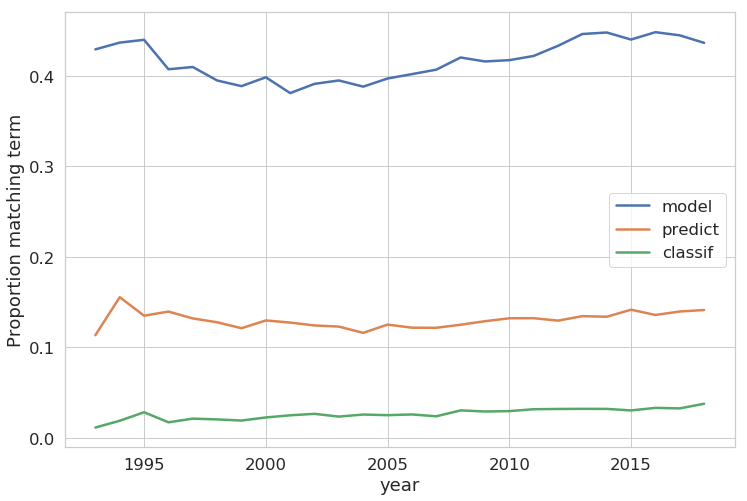

In [66]:
terms = ["model","predict","classif"]
fig = search_counts(df_astro,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

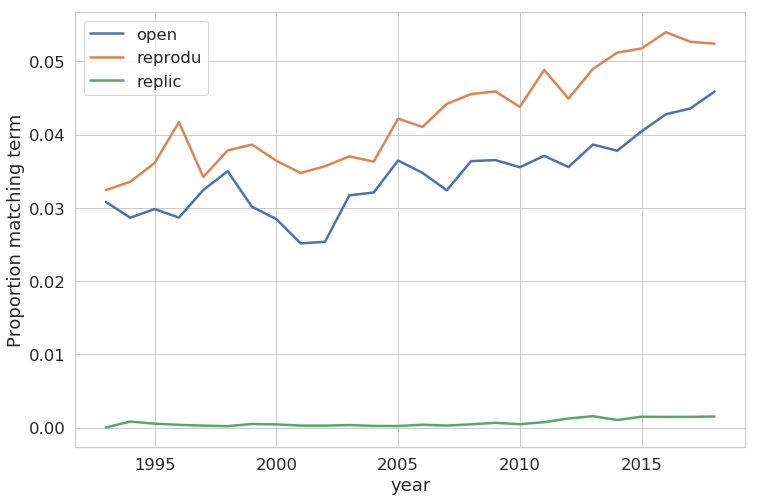

In [67]:
terms = ["open","reprodu","replic"]
fig = search_counts(df_astro,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

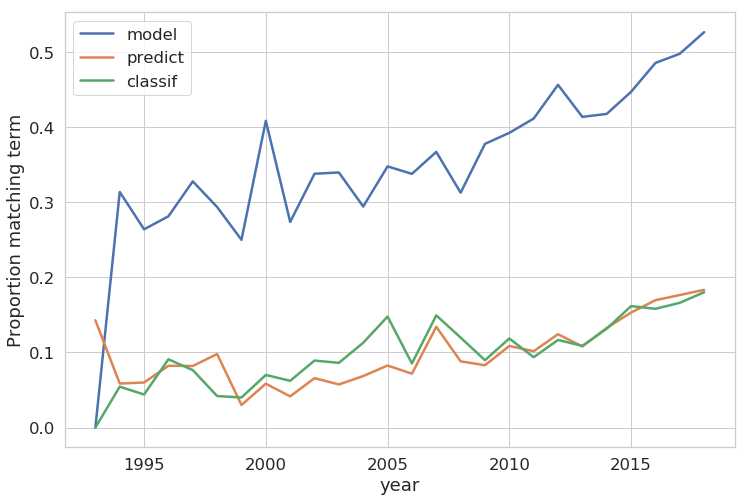

In [68]:
terms = ["model","predict","classif"]
fig = search_counts(df_cats,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

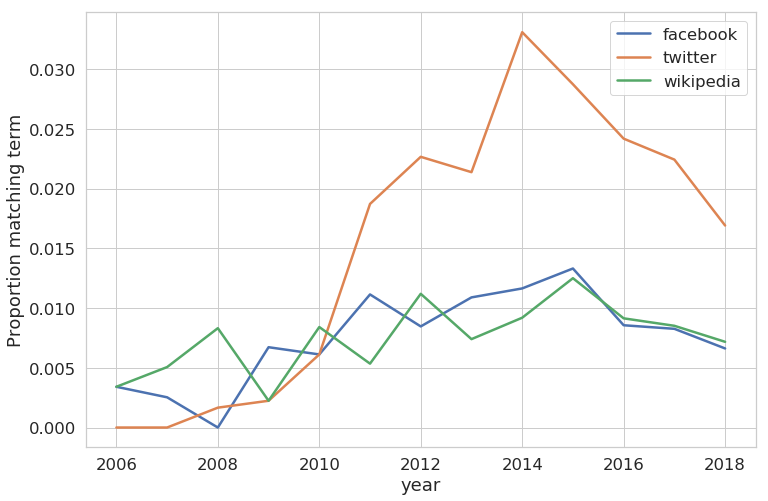

In [69]:
terms = ["facebook","twitter","wikipedia"]
fig = search_counts(df_cats,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

In [70]:
time_elapsed(start)

'Total runtime: 8 minutes, 31 seconds'